## **Problem Statement**

### Business Context

The prices of the stocks of companies listed under a global exchange are influenced by a variety of factors, with the company's financial performance, innovations and collaborations, and market sentiment being factors that play a significant role. News and media reports can rapidly affect investor perceptions and, consequently, stock prices in the highly competitive financial industry. With the sheer volume of news and opinions from a wide variety of sources, investors and financial analysts often struggle to stay updated and accurately interpret its impact on the market. As a result, investment firms need sophisticated tools to analyze market sentiment and integrate this information into their investment strategies.

### Problem Definition

With an ever-rising number of news articles and opinions, an investment startup aims to leverage artificial intelligence to address the challenge of interpreting stock-related news and its impact on stock prices. They have collected historical daily news for a specific company listed under NASDAQ, along with data on its daily stock price and trade volumes.

As a member of the Data Science and AI team in the startup, you have been tasked with analyzing the data, developing an AI-driven sentiment analysis system that will automatically process and analyze news articles to gauge market sentiment, and summarizing the news at a weekly level to enhance the accuracy of their stock price predictions and optimize investment strategies. This will empower their financial analysts with actionable insights, leading to more informed investment decisions and improved client outcomes.

### Data Dictionary

* `Date` : The date the news was released
* `News` : The content of news articles that could potentially affect the company's stock price
* `Open` : The stock price (in \$) at the beginning of the day
* `High` : The highest stock price (in \$) reached during the day
* `Low` :  The lowest stock price (in \$) reached during the day
* `Close` : The adjusted stock price (in \$) at the end of the day
* `Volume` : The number of shares traded during the day
* `Label` : The sentiment polarity of the news content
    * 1: positive
    * 0: neutral
    * -1: negative

## **Please read the instructions carefully before starting the project.**

**Note**: If the free-tier GPU of Google Colab is not accessible (due to unavailability or exhaustion of daily limit or other reasons), the following steps can be taken:

1. Wait for 12-24 hours until the GPU is accessible again or the daily usage limits are reset.

2. Switch to a different Google account and resume working on the project from there.

3. Try using the CPU runtime:
    - To use the CPU runtime, click on *Runtime* => *Change runtime type* => *CPU* => *Save*
    - One can also click on the *Continue without GPU* option to switch to a CPU runtime (kindly refer to the snapshot below)
    - The instructions for running the code on the CPU are provided in the respective sections of the notebook.

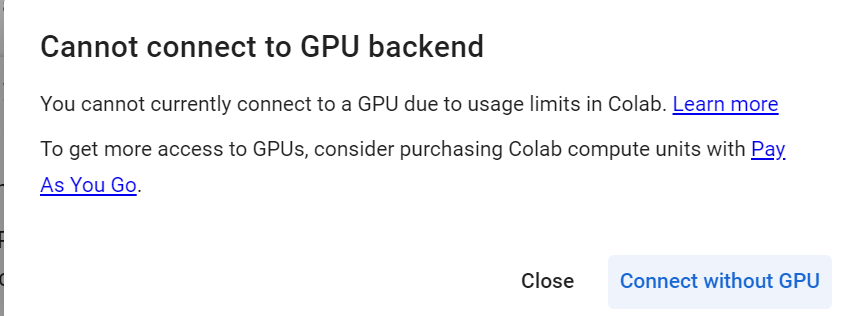

## **Installing and Importing Necessary Libraries**

In [1]:
# installing the sentence-transformers and gensim libraries for word embeddings
!pip install -U sentence-transformers gensim transformers tqdm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 105.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.0 MB/s eta 0:00:00


In [2]:
# to read and manipulate the data
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)    # setting column to the maximum column width as per the data

# to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# to use regular expressions for manipulating text data
import re

# to manipulate string data
import string

# To used time-related functions
import time

# to load the natural language toolkit
import nltk
nltk.download('stopwords')    # loading the stopwords
nltk.download('wordnet')    # loading the wordnet module that is used in stemming

# to remove common stop words
from nltk.corpus import stopwords

# to perform stemming
from nltk.stem.porter import PorterStemmer

# to create Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# to split data into train and test sets
from sklearn.model_selection import train_test_split

# to build a Random Forest model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# to compute metrics to evaluate the model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

# To load/create word embeddings
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# To work with transformer models
import torch
from sentence_transformers import SentenceTransformer

# To implement progress bar related functionalities
from tqdm import tqdm
tqdm.pandas()

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## **Loading the dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading data into a pandas dataframe
stock_news = pd.read_csv("/content/drive/MyDrive/AIMLColab/Natural Language Processing/Project-Stock Market Sentiment Analysis/stock_news.csv")

In [ ]:
data = stock_news.copy()

## **Data Overview**

#### Checking first 5 rows of data

In [ ]:
data.head(5)

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,"The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January.",41.740002,42.244999,41.482498,40.246914,130672400,-1
1,2019-01-02,"Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple's stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10",41.740002,42.244999,41.482498,40.246914,130672400,-1
2,2019-01-02,"Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple's shares fell 8.5% in post market trading, while Asian suppliers like Hon",41.740002,42.244999,41.482498,40.246914,130672400,-1
3,2019-01-02,"This news article reports that yields on long-dated U.S. Treasury securities hit their lowest levels in nearly a year on January 2, 2019, due to concerns about the health of the global economy following weak economic data from China and Europe, as well as the partial U.S. government shutdown. Apple",41.740002,42.244999,41.482498,40.246914,130672400,-1
4,2019-01-02,"Apple's revenue warning led to a decline in USD JPY pair and a gain in Japanese yen, as investors sought safety in the highly liquid currency. Apple's underperformance in Q1, with forecasted revenue of $84 billion compared to analyst expectations of $91.5 billion, triggered risk aversion mood in markets",41.740002,42.244999,41.482498,40.246914,130672400,-1


#### Checking the Shape of the Data set

In [ ]:
print("There are ",data.shape[1], "Columns and ", data.shape[0], "Rows in the dataset")

There are  8 Columns and  349 Rows in the dataset


In [ ]:
data["Date"].nunique()

71

#### Checking Missing values

In [ ]:
data.isnull().sum()

,0
Date,0
News,0
Open,0
High,0
Low,0
Close,0
Volume,0
Label,0


There are no Missing values in the data set

#### Checking for duplicate values

In [ ]:
print("There are ",data.duplicated().sum(), "duplicate values in the dataset")

There are  0 duplicate values in the dataset


## **Exploratory Data Analysis**

### Univariate Analysis

* Distribution of individual variables
* Compute and check the distribution of the length of news content

In [ ]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        hue=feature,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Distribution of Reviews

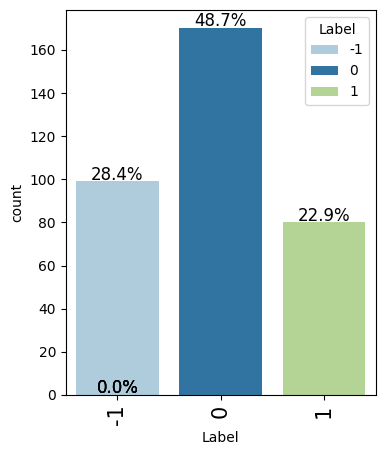

In [ ]:
labeled_barplot(data, "Label", perc=True)

* 22.9% of the news is positive, 28.4% is negative and rest is neutral

#### Density Plot of Price (Open,High,Low,Close)

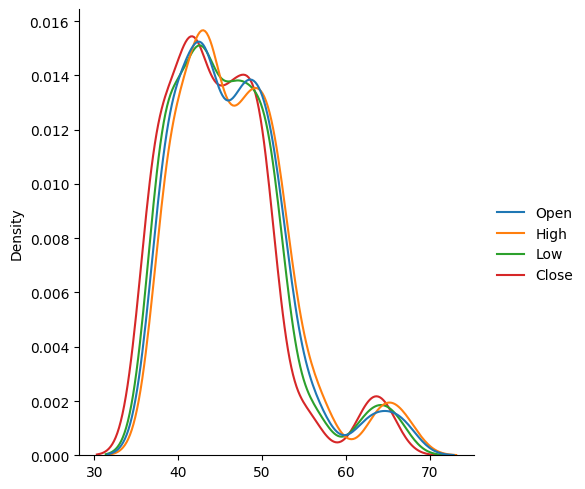

In [ ]:
sns.displot(data=data[['Open', 'High', 'Low', 'Close']], kind="kde", palette="tab10");

#### Observation on Volume

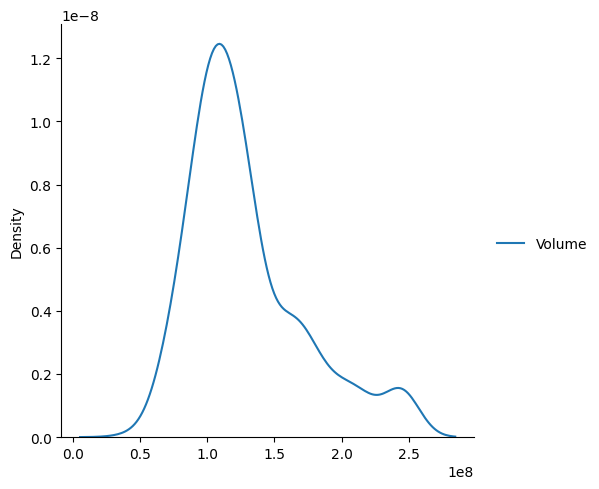

In [ ]:
sns.displot(data=data[['Volume']], kind="kde", palette="tab10");

* Distribution of price for Open,High, Low, Close and Volume data is skewed litle towards right

#### Observations on News length

In [ ]:
#Calculating the total number of words present in the news content.
data['news_len'] = data['News'].apply(lambda x: len(x.split(' ')))

data['news_len'].describe()

,news_len
count,349.000000
mean,49.312321
std,5.727770
min,19.000000
25%,46.000000
50%,50.000000
75%,53.000000
max,61.000000


### Bivariate Analysis

* Correlation
* Sentiment Polarity vs Price
* Date vs Price

**Note**: The above points are listed to provide guidance on how to approach bivariate analysis. Analysis has to be done beyond the above listed points to get maximum scores.

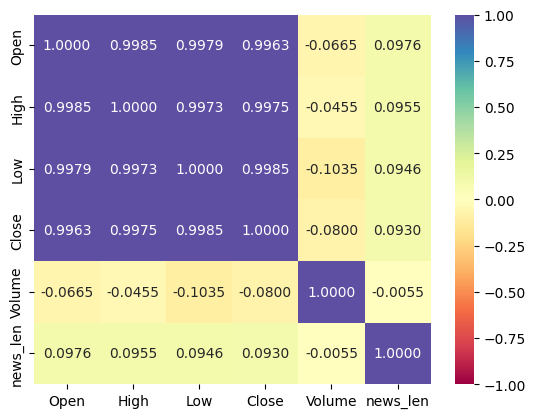

In [ ]:
num_feature = ['Open', 'High', 'Low', 'Close', 'Volume', 'news_len']
sns.heatmap(
    data[num_feature].corr(), annot=True, vmin=-1, vmax=1, fmt=".4f", cmap="Spectral"
);

* Open,High,Low and close has high co-relation, but volume has negative co-relation with open,high,low,close and news_length

#### Label vs Price (Open, High, Low, Close)

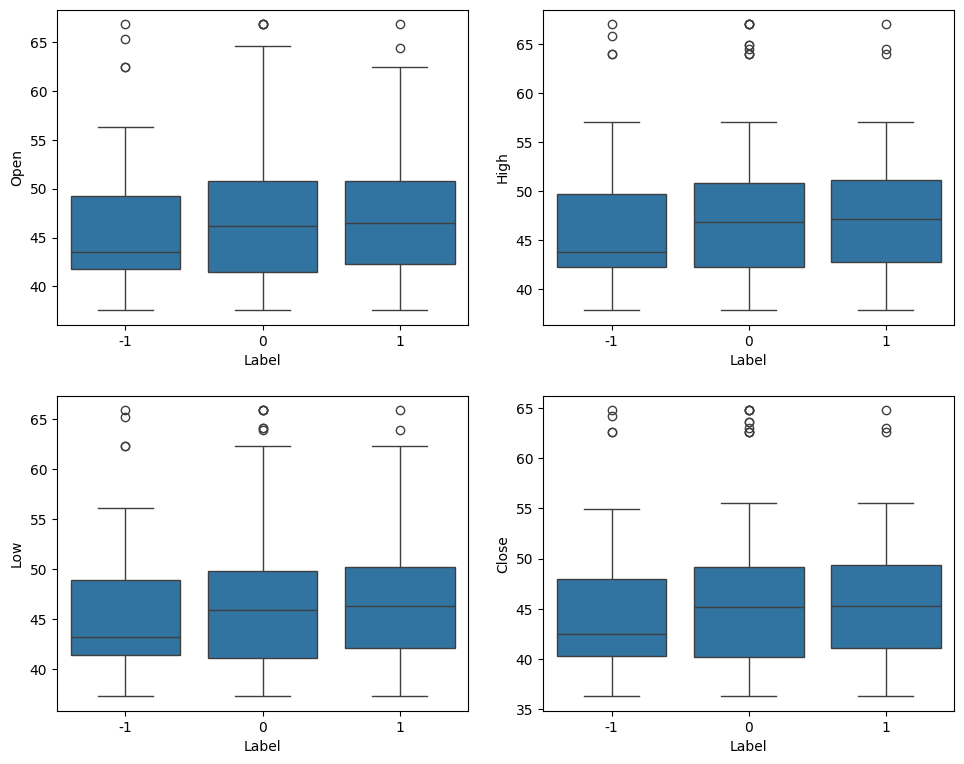

In [ ]:
plt.figure(figsize=(10, 8))

for i, variable in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=data, x='Label', y=variable)
    plt.tight_layout(pad=2)

plt.show()

* Higha and close have outliers for sentiment but Low and Open has less outliers for sentiment

#### Label V/s Volume

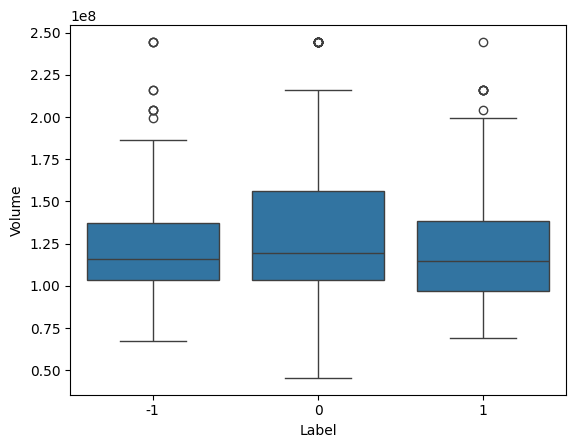

In [ ]:
sns.boxplot(data=data, x='Label', y='Volume');

#### Date vs Price (Open, High, Low, Close)

In [ ]:
stock_daily = data.groupby('Date').agg(
    {
        'Open': 'mean',
        'High': 'mean',
        'Low': 'mean',
        'Close': 'mean',
        'Volume': 'mean',
    }
).reset_index()  # Group the 'stocks' DataFrame by the 'Date' column

stock_daily.set_index('Date', inplace=True)
stock_daily.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,41.740002,42.244999,41.482498,40.246914,130672400.0
2019-01-03,43.570000,43.787498,43.222500,42.470604,103544800.0
2019-01-04,47.910000,47.919998,47.095001,46.419842,111448000.0
2019-01-07,50.792500,51.122501,50.162498,49.110790,109012000.0
2019-01-08,53.474998,54.507500,51.685001,50.787209,216071600.0


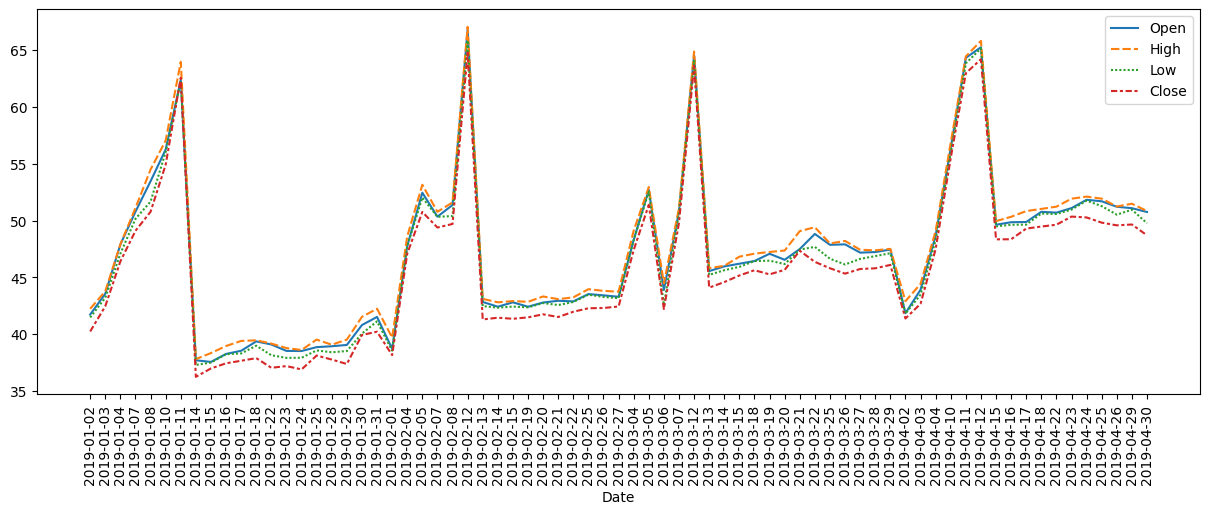

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.lineplot(stock_daily.drop("Volume", axis=1));

#### Volume vs Close Price

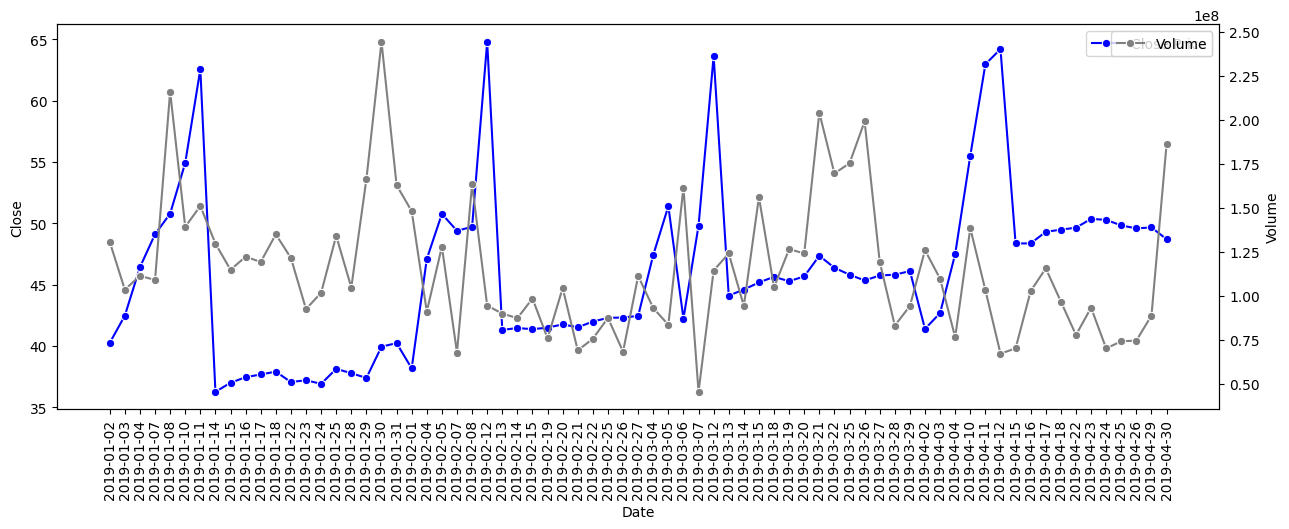

In [ ]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(15,5))
plt.xticks(rotation=90)

# Lineplot on primary y-axis
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Close', ax=ax1, color='blue', marker='o', label='Close Price')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Lineplot on secondary y-axis
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Volume', ax=ax2, color='gray', marker='o', label='Volume')

ax1.legend(bbox_to_anchor=(1,1));

## **Data Preprocessing**

In [ ]:
data['Date'].describe()

,Date
count,349
unique,71
top,2019-01-03
freq,28


#### Train-test-validation Split

* Lets split the Train, Test and Validation data based on dates.

In [ ]:
X_train = data[(data['Date'] < '2019-03-15')].reset_index()
X_val = data[(data['Date'] >= '2019-03-15') & (data['Date'] < '2019-04-16')].reset_index()
X_test = data[data['Date'] >= '2019-04-16'].reset_index()

In [ ]:
y_train = X_train["Label"].copy()
y_val = X_val["Label"].copy()
y_test = X_test["Label"].copy()

In [ ]:
print("Train data shape",X_train.shape)
print("Validation data shape",X_val.shape)
print("Test data shape ",X_test.shape)

print("Train label shape",y_train.shape)
print("Validation label shape",y_val.shape)
print("Test label shape ",y_test.shape)

Train data shape (240, 10)
Validation data shape (67, 10)
Test data shape  (42, 10)
Train label shape (240,)
Validation label shape (67,)
Test label shape  (42,)


## **Word Embeddings**

#### Word2Vec

- `Word2Vec` is imported from Gensim library

- `Word2Vec` takes the following important parameters:
    1. `word_list`: List of all words in all documents
    2. `vector_size`: Determines the size of the word vectors
    2. `min_count`: It will ignore all the words with a total frequency lower than this.
    3. `Workers`: These are the number of threads to train the model.
    4. 'window': Size of context relative to target word.

- By default, it creates word vectors of size 100, but here we will vectors of size 300

In [ ]:
words_list = [item.split(" ") for item in data['News'].values]

In [ ]:
vec_size = 300
model_W2V = Word2Vec(words_list, vector_size = vec_size, min_count = 1, window=5, workers = 6)

In [ ]:
print("Length of the vocabulary is", len(list(model_W2V.wv.key_to_index)))

Length of the vocabulary is 4682


Let's check out a few word embeddings obtained using the model.

In [ ]:
# Checking top 5 similar words to the word 'good'
similar = model_W2V.wv.similar_by_word('market', topn=5)
print(similar)

**Note**: The similarity between words is computed using cosine similarity.

In [ ]:
# Checking the word embedding of a word stock
word = "stock"
model_W2V.wv[word]

array([-4.03795904e-03,  3.75995934e-02,  8.23146850e-03,  1.14608947e-02,
        1.31258590e-03, -5.71377836e-02,  2.86502931e-02,  8.77512470e-02,
        3.87988379e-03, -2.18928456e-02,  5.90461446e-03, -2.08594706e-02,
       -4.55765007e-03,  1.47835510e-02, -2.54732259e-02, -2.67974325e-02,
        2.29918566e-02, -3.99966305e-03,  6.46188436e-03, -2.46391688e-02,
       -2.30254065e-02,  7.93776661e-03,  2.93622464e-02,  1.47720929e-02,
        2.42835917e-02,  7.45111553e-04, -3.54496650e-02,  8.39811377e-03,
       -2.87143793e-02, -4.14421335e-02,  1.02318665e-02, -2.72786617e-02,
        4.73611988e-03, -8.88683088e-03, -1.55648077e-03,  2.33113579e-02,
        1.24873556e-02, -3.42379399e-02, -2.59626354e-03, -1.24146799e-02,
       -1.99018996e-02,  3.88781261e-03, -3.22729575e-05, -2.05477327e-02,
        1.98853724e-02,  3.79891954e-02,  8.75193160e-03,  1.77444834e-02,
        1.14593888e-04,  2.33597197e-02,  1.16908094e-02, -9.41158645e-03,
       -2.06600744e-02,  

In [ ]:
# Checking the word embedding of a word economy
word = "economy"
model_W2V.wv[word]

array([-1.1611377e-03,  5.2364124e-03,  3.2334863e-03,  1.9037937e-03,
       -1.1185606e-03, -1.1413314e-02,  6.6941986e-03,  1.5702693e-02,
       -1.9564249e-03, -2.1799651e-03, -2.4473295e-03, -3.4876373e-03,
        8.0537505e-04, -3.1507778e-04, -4.2217164e-03, -1.7511403e-03,
        7.2273151e-03,  1.9051936e-03,  3.7083561e-03, -2.6926959e-03,
       -5.8387737e-03,  2.7943798e-03,  3.9456761e-03, -8.3960657e-04,
        1.2592559e-03, -1.2048262e-03, -7.1478654e-03,  2.2585283e-03,
       -6.6524614e-03, -9.7355749e-03, -1.9397830e-03, -6.5706894e-03,
        2.9191505e-03, -2.7103289e-03, -2.6501904e-03,  5.9262915e-03,
       -1.4262910e-04, -5.3941505e-03, -8.0841834e-05, -2.9649541e-03,
       -5.7475464e-03,  8.2148606e-04,  1.4322350e-03, -3.8982444e-03,
        3.9249100e-03,  3.8455231e-03, -6.1106175e-04,  1.1525449e-03,
       -4.2420397e-05,  1.0279185e-03,  4.6388223e-03, -4.1859858e-03,
       -4.0978473e-03,  4.7198229e-04, -2.8551782e-03,  6.9454559e-03,
      

In [ ]:
# Retrieving the words present in the Word2Vec model's vocabulary
words = list(model_W2V.wv.key_to_index.keys())

# Retrieving word vectors for all the words present in the model's vocabulary
wvs = model_W2V.wv[words].tolist()

# Creating a dictionary of words and their corresponding vectors
word_vector_dict = dict(zip(words, wvs))

In [ ]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
start = time.time()

X_train_wv = pd.DataFrame(X_train["News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_val_wv = pd.DataFrame(X_val["News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_test_wv = pd.DataFrame(X_test["News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])

end = time.time()
print('Time taken ', (end-start))

Time taken  0.48432016372680664


In [ ]:
print(X_train_wv.shape, X_val_wv.shape, X_test_wv.shape)

(240, 300) (67, 300) (42, 300)


#### Glove

In [ ]:
filename = '/content/drive/MyDrive/AIMLColab/Natural Language Processing/Project-Stock Market Sentiment Analysis/glove.6B.100d.txt.word2vec'
glove_model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [ ]:
print("Length of the vocabulary is", len(glove_model.index_to_key))

Length of the vocabulary is 400000


Let's check out a few word embeddings.

In [ ]:
# Checking the word embedding of a random stock
word = "stock"
glove_model[word]

array([ 8.6341e-01,  6.9648e-01,  4.5794e-02, -9.5708e-03, -2.5498e-01,
       -7.4666e-01, -2.2086e-01, -4.4615e-01, -1.0423e-01, -9.9931e-01,
        7.2550e-02,  4.5049e-01, -5.9912e-02, -5.7837e-01, -4.6540e-01,
        4.3429e-02, -5.0570e-01, -1.5442e-01,  9.8250e-01, -8.1571e-02,
        2.6523e-01, -2.3734e-01,  9.7675e-02,  5.8588e-01, -1.2948e-01,
       -6.8956e-01, -1.2811e-01, -5.2265e-02, -6.7719e-01,  3.0190e-02,
        1.8058e-01,  8.6121e-01, -8.3206e-01, -5.6887e-02, -2.9578e-01,
        4.7180e-01,  1.2811e+00, -2.5228e-01,  4.9557e-02, -7.2455e-01,
        6.6758e-01, -1.1091e+00, -2.0493e-01, -5.8669e-01, -2.5375e-03,
        8.2777e-01, -4.9102e-01, -2.6475e-01,  4.3015e-01, -2.0516e+00,
       -3.3208e-01,  5.1845e-02,  5.2646e-01,  8.7452e-01, -9.0237e-01,
       -1.7366e+00, -3.4727e-01,  1.6590e-01,  2.7727e+00,  6.5756e-02,
       -4.0363e-01,  3.8252e-01, -3.0787e-01,  5.9202e-01,  1.3468e-01,
       -3.3851e-01,  3.3646e-01,  2.0950e-01,  8.5905e-01,  5.18

In [ ]:
# Checking the word embedding of a random economy
word = "economy"
glove_model[word]

array([-0.19382  ,  1.017    ,  1.076    ,  0.02954  , -0.39192  ,
       -1.3891   , -0.87873  , -0.63162  ,  0.9643   , -0.43035  ,
       -0.34868  ,  0.22736  , -0.40296  ,  0.15641  , -0.16813  ,
       -0.15343  , -0.15799  , -0.27612  ,  0.18088  , -0.28386  ,
        0.49847  ,  0.29864  ,  0.32353  ,  0.18108  , -0.59623  ,
       -0.54165  , -0.70019  , -0.64956  , -0.69063  ,  0.18084  ,
       -0.38581  ,  0.56086  , -0.40313  , -0.38777  , -0.70615  ,
        0.20657  ,  0.34171  , -0.23393  , -0.35882  , -0.2201   ,
       -0.76182  , -1.2047   ,  0.4339   ,  1.1656   ,  0.1836   ,
       -0.21601  ,  0.93198  , -0.059616 , -0.11624  , -1.3259   ,
       -0.79772  , -0.0074957, -0.0889   ,  1.4749   ,  0.31157  ,
       -2.2952   , -0.058351 ,  0.39353  ,  1.4983   ,  0.74023  ,
       -0.20109  ,  0.098124 , -0.73081  , -0.32294  ,  0.16703  ,
        0.87431  , -0.041624 , -0.51022  ,  1.0737   , -0.4257   ,
        1.0581   ,  0.19859  , -0.60087  , -0.33906  ,  0.6024

In [ ]:
# Retrieving the words present in the GloVe model's vocabulary
glove_words = glove_model.index_to_key

# Creating a dictionary of words and their corresponding vectors
glove_word_vector_dict = dict(zip(glove_model.index_to_key,list(glove_model.vectors)))

In [ ]:
vec_size=100

In [ ]:
def average_vectorizer_GloVe(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in glove_words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(glove_word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
# creating a dataframe of the vectorized documents
start = time.time()

X_train_gl = pd.DataFrame(X_train["News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_val_gl = pd.DataFrame(X_val["News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_test_gl = pd.DataFrame(X_test["News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])

end = time.time()
print('Time taken ', (end-start))

Time taken  25.54612922668457


In [ ]:
print(X_train_gl.shape, X_val_gl.shape, X_test_gl.shape)

(240, 100) (67, 100) (42, 100)


### Sentence Transformer

#### Defining the model

We'll be using the **all-MiniLM-L6-v2** model here.

💡 The **all-MiniLM-L6-v2** model is an all-round (**all**) model trained on a large and diverse dataset of over 1 billion training samples and generates state-of-the-art sentence embeddings of 384 dimensions.

📊  It is a language model (**LM**) that has 6 transformer encoder layers (**L6**) and is a smaller model (**Mini**) trained to mimic the performance of a larger model (BERT).

🛠️ Potential use-cases include text classification, sentiment analysis, and semantic search.

In [ ]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

#### Encoding the dataset

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# encoding the dataset
start = time.time()

X_train_st = model.encode(X_train["News"].values, show_progress_bar=True, device=device)
X_val_st = model.encode(X_val["News"].values, show_progress_bar=True, device=device)
X_test_st = model.encode(X_test["News"].values, show_progress_bar=True, device=device)

end = time.time()
print("Time taken ",(end-start))

Batches:   0%|          | 0/8 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Time taken  0.8770787715911865


In [ ]:
print(X_train_st.shape, X_val_st.shape, X_test_st.shape)

(240, 384) (67, 384) (42, 384)


- Each news content has been converted to a 384-dimensional vector.

## **Sentiment Analysis**

#### Model Evaluation Criterion

* RandomForestClassifier  is strong choice for sentiment analysis, especially with limited computational resources or when interpretability (via feature importances) is desired also works well "out-of-the-box" with default hyperparameters.
* We have only 329 rows of data, so RandomForestClassifier is the best model for sentimental analysis
* If we had sufficient or large data may other models like GradientBoostingClassifier would have been the bset choice.


#### Utility Functions

In [ ]:
def plot_confusion_matrix(model, predictors, target):
    """
    Plot a confusion matrix to visualize the performance of a classification model.

    Parameters:
    actual (array-like): The true labels.
    predicted (array-like): The predicted labels from the model.

    Returns:
    None: Displays the confusion matrix plot.
    """
    pred = model.predict(predictors)  # Make predictions using the classifier.

    cm = confusion_matrix(target, pred)  # Compute the confusion matrix.

    plt.figure(figsize=(5, 4))  # Create a new figure with a specified size.
    label_list = [0, 1,-1]  # Define the labels for the confusion matrix.
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', xticklabels=label_list, yticklabels=label_list)
    # Plot the confusion matrix using a heatmap with annotations.

    plt.ylabel('Actual')  # Label for the y-axis.
    plt.xlabel('Predicted')  # Label for the x-axis.
    plt.title('Confusion Matrix')  # Title of the plot.
    plt.show()  # Display the plot.

In [ ]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Compute various performance metrics for a classification model using sklearn.

    Parameters:
    model (sklearn classifier): The classification model to evaluate.
    predictors (array-like): The independent variables used for predictions.
    target (array-like): The true labels for the dependent variable.

    Returns:
    pandas.DataFrame: A DataFrame containing the computed metrics (Accuracy, Recall, Precision, F1-score).
    """
    pred = model.predict(predictors)  # Make predictions using the classifier.

    acc = accuracy_score(target, pred)  # Compute Accuracy.
    recall = recall_score(target, pred,average='weighted')  # Compute Recall.
    precision = precision_score(target, pred,average='weighted')  # Compute Precision.
    f1 = f1_score(target, pred,average='weighted')  # Compute F1-score.

    # Create a DataFrame to store the computed metrics.
    df_perf = pd.DataFrame(
        {
            "Accuracy": [acc],
            "Recall": [recall],
            "Precision": [precision],
            "F1": [f1],
        }
    )

    return df_perf  # Return the DataFrame with the metrics.

#### Base Model - Word2Vec

In [ ]:
# Building the model
base_wv = RandomForestClassifier(n_estimators = 100, max_depth = 7, random_state=42)

# Fitting on train data of Word2Vec
base_wv.fit(X_train_wv, y_train)

RandomForestClassifier(max_depth=7, random_state=42)

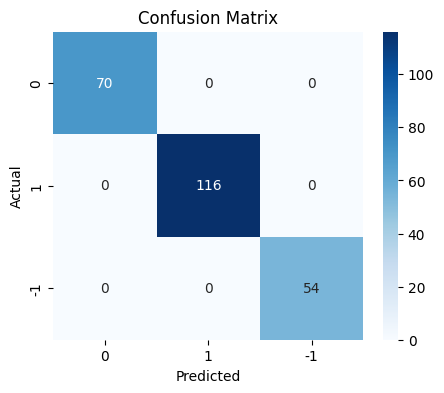

In [ ]:
plot_confusion_matrix(base_wv,X_train_wv,y_train)

* Sentiment analysis for Word2Vec train data for RandomForestClassifier model is so good on train data, model predection is 100%

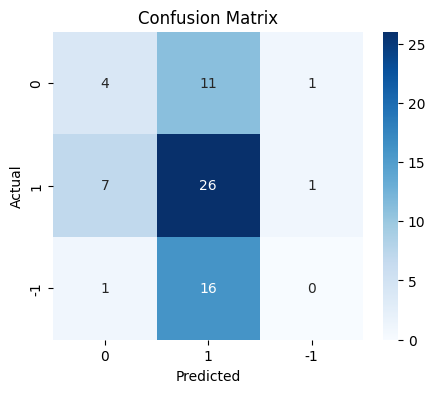

In [ ]:
plot_confusion_matrix(base_wv,X_val_wv,y_val)

* Base Model for Word2Vec predection on validation data is poor, 7 times it predectied as neutral but actually it was positive

In [ ]:
#Calculating different metrics on training data
base_train_wv = model_performance_classification_sklearn(base_wv,X_train_wv,y_train)
print("Training performance:\n", base_train_wv)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
#Calculating different metrics on validation data
base_val_wv = model_performance_classification_sklearn(base_wv,X_val_wv,y_val)
print("Validation performance:\n",base_val_wv)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.447761  0.447761   0.328546  0.371541


* Performance matrix indicates model predicted really well on train but poor on validation data

#### Base Model - GloVe

In [ ]:
#Building the model
base_Glove = RandomForestClassifier(n_estimators = 100, max_depth = 7, random_state=42)

# Fitting on train data of Glove
base_Glove.fit(X_train_gl, y_train)

RandomForestClassifier(max_depth=7, random_state=42)

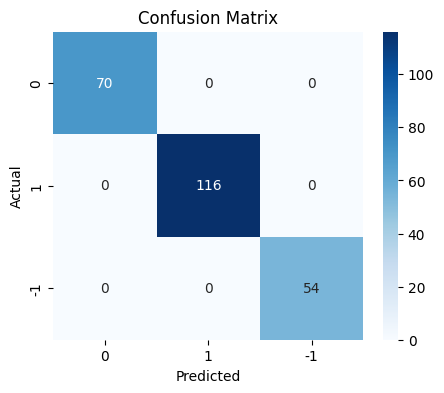

In [ ]:
plot_confusion_matrix(base_Glove,X_train_gl,y_train)

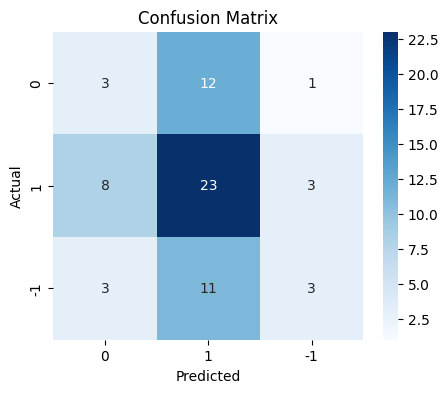

In [ ]:
plot_confusion_matrix(base_Glove,X_val_gl,y_val)

In [ ]:
#Calculating different metrics on training data
base_train_gl=model_performance_classification_sklearn(base_Glove,X_train_gl,y_train)
print("Training performance:\n", base_train_gl)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
#Calculating different metrics on validation data
base_val_gl = model_performance_classification_sklearn(base_Glove, X_val_gl, y_val)
print("Validation performance:\n",base_val_gl)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.432836  0.432836   0.413646  0.402985


* Again Base-Glove model performance on validation is poor but excellent on train data

#### Base Model - Sentence Transformer

In [ ]:
# Building the model

base_st = RandomForestClassifier(n_estimators = 100, max_depth = 7, random_state=42)

# Fitting on train data of sentence transformer
base_st.fit(X_train_st, y_train)

RandomForestClassifier(max_depth=7, random_state=42)

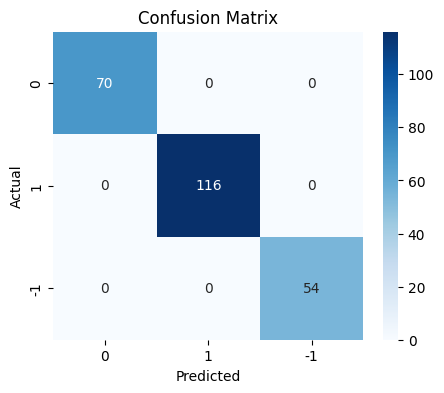

In [ ]:
plot_confusion_matrix(base_st,X_train_st,y_train)

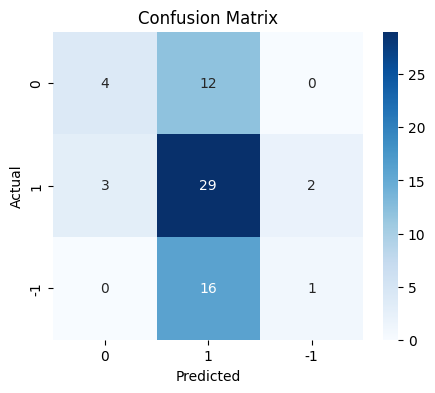

In [ ]:
plot_confusion_matrix(base_st,X_val_st,y_val)

In [ ]:
#Calculating different metrics on training data
base_train_st=model_performance_classification_sklearn(base_st, X_train_st, y_train)
print("Training performance:\n", base_train_st)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
#Calculating different metrics on validation data
base_val_st = model_performance_classification_sklearn(base_st, X_val_st, y_val)
print("Validation performance:\n",base_val_st)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.507463  0.507463    0.47922  0.431874


* Base Model for Sentence Transformer data for RandomClassifier did well on Train data and poorly on validation.

### Model Tuning

Lets tune the model with GridSearchCV
* GridSearchCV is hyperparameter tuning technique in ML that systematically explores a predefined set of hyperparameter combinations.

#### Tuned Model - Word2Vec

**Note**: The parameter grid provided below is a sample grid. It can be modified depending on the compute power of the system being used.

In [ ]:
start = time.time()
tuned_wv = RandomForestClassifier(n_estimators = 100, max_depth = 7, random_state=42)


parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_wv, parameters, scoring='f1_weighted',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_wv, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_wv = grid_obj.best_estimator_

Time taken  22.169469118118286


In [ ]:
# Fit the best algorithm to the data.
tuned_wv.fit(X_train_wv, y_train)

RandomForestClassifier(max_depth=6, max_features=0.2, min_samples_split=5,
                       random_state=42)

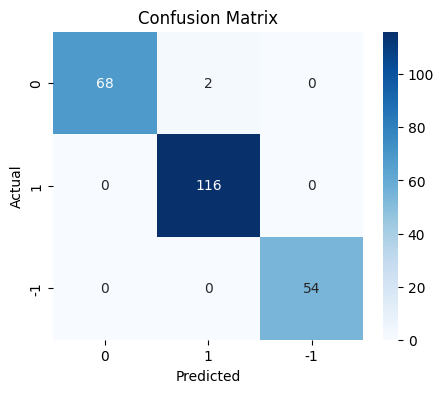

In [ ]:
plot_confusion_matrix(tuned_wv,X_train_wv,y_train)

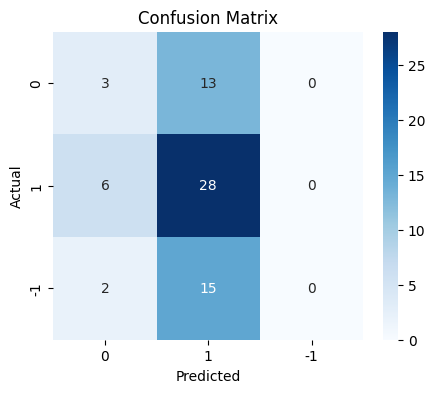

In [ ]:
plot_confusion_matrix(tuned_wv,X_val_wv,y_val)

In [ ]:
#Calculating different metrics on training data
tuned_train_wv=model_performance_classification_sklearn(tuned_wv,X_train_wv,y_train)
print("Training performance:\n",tuned_train_wv)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.991667  0.991667   0.991808  0.991642


In [ ]:
#Calculating different metrics on validation data
tuned_val_wv = model_performance_classification_sklearn(tuned_wv,X_val_wv,y_val)
print("Validation performance:\n",tuned_val_wv)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.462687  0.462687    0.31886  0.368823


* Tuned word2Vec has not improved much on validation data

#### Tuned Model - GloVe

In [ ]:
start = time.time()

tuned_gl = RandomForestClassifier(n_estimators = 100, max_depth = 7, random_state=42)

parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_gl, parameters, scoring='f1_weighted',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_gl, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_gl = grid_obj.best_estimator_

Time taken  11.917385339736938


In [ ]:
# Fit the best algorithm to the data.
tuned_gl.fit(X_train_gl, y_train)

RandomForestClassifier(max_depth=6, max_features=0.2, min_samples_split=5,
                       random_state=42)

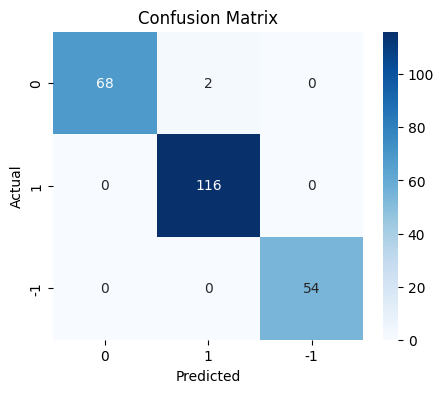

In [ ]:
plot_confusion_matrix(tuned_gl,X_train_gl,y_train)

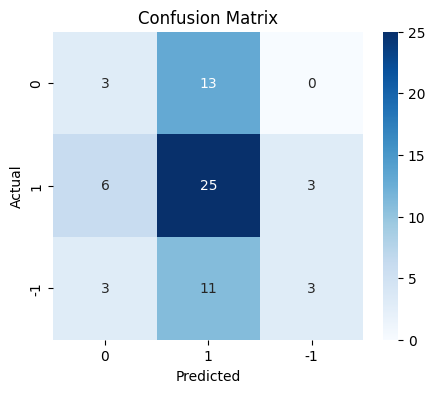

In [ ]:
plot_confusion_matrix(tuned_gl,X_val_gl,y_val)

In [ ]:
#Calculating different metrics on training data
tuned_train_gl=model_performance_classification_sklearn(tuned_gl,X_train_gl,y_train)
print("Training performance:\n",tuned_train_gl)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.991667  0.991667   0.991808  0.991642


In [ ]:
#Calculating different metrics on validation data
tuned_val_gl = model_performance_classification_sklearn(tuned_gl,X_val_gl,y_val)
print("Validation performance:\n",tuned_val_gl)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.462687  0.462687   0.445477  0.423064


* Tuned Glove still performed poorly on validation data

#### Tuned Model - Sentence Transformer

In [ ]:
start = time.time()
tuned_st = RandomForestClassifier(n_estimators = 100, max_depth = 7, random_state=42)

parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_st, parameters, scoring='f1_weighted',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_st, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_st = grid_obj.best_estimator_

Time taken  22.909716606140137


In [ ]:
# Fit the best algorithm to the data.
tuned_st.fit(X_train_st, y_train)

RandomForestClassifier(max_depth=4, max_features=0.4, min_samples_split=7,
                       random_state=42)

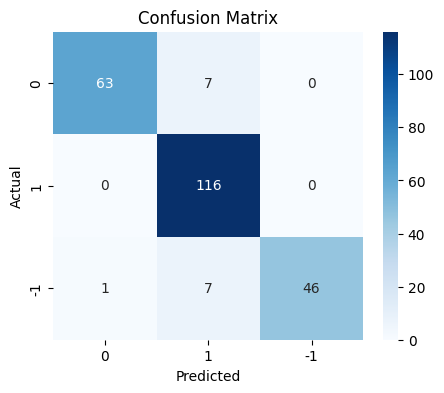

In [ ]:
plot_confusion_matrix(tuned_st,X_train_st,y_train)

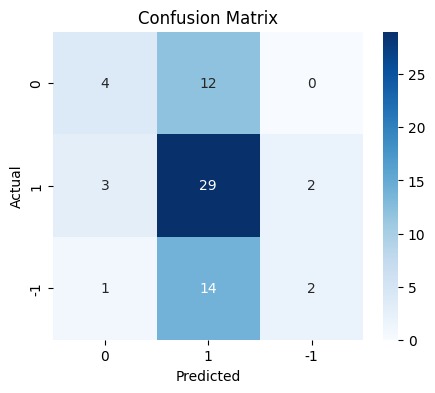

In [ ]:
plot_confusion_matrix(tuned_st,X_val_st,y_val)

In [ ]:
#Calculating different metrics on training data
tuned_train_st=model_performance_classification_sklearn(tuned_st,X_train_st,y_train)
print("Training performance:\n",tuned_train_st)

Training performance:
    Accuracy  Recall  Precision       F1
0    0.9375  0.9375   0.943391  0.93708


In [ ]:
#Calculating different metrics on validation data
tuned_val_st = model_performance_classification_sklearn(tuned_st,X_val_st,y_val)
print("Validation performance:\n",tuned_val_st)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.522388  0.522388    0.51384  0.458638


* Tuned Sentence Transformer performed little bit better as compared to other model
* Even after running the model with different set of data and parameter performance of tuned model on validation remains same

### Model Performance Summary and Final Model Selection

In [ ]:
#training performance comparison

models_train_comp_df = pd.concat(
    [base_train_wv.T,
     base_train_gl.T,
     base_train_st.T,
     tuned_train_wv.T,
     tuned_train_gl.T,
     tuned_train_st.T,
    ],axis=1
)

models_train_comp_df.columns = [
    "Base Model (Word2Vec)",
    "Base Model (GloVe)",
    "Base Model (Sentence Transformer)",
    "Tuned Model (Word2Vec)",
    "Tuned Model (GloVe)",
    "Tuned Model (Sentence Transformer)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Base Model (Word2Vec),Base Model (GloVe),Base Model (Sentence Transformer),Tuned Model (Word2Vec),Tuned Model (GloVe),Tuned Model (Sentence Transformer)
Accuracy,1.0,1.0,1.0,0.991667,0.991667,0.937500
Recall,1.0,1.0,1.0,0.991667,0.991667,0.937500
Precision,1.0,1.0,1.0,0.991808,0.991808,0.943391
F1,1.0,1.0,1.0,0.991642,0.991642,0.937080


In [ ]:
#validation performance comparison
models_val_comp_df = pd.concat(
    [base_val_wv.T,
     base_val_gl.T,
     base_val_st.T,
     tuned_val_wv.T,
     tuned_val_gl.T,
     tuned_val_st.T,
     ],axis=1
)

models_val_comp_df.columns = [
    "Base Model (Word2Vec)",
    "Base Model (GloVe)",
    "Base Model (Sentence Transformer)",
    "Tuned Model (Word2Vec)",
    "Tuned Model (GloVe)",
    "Tuned Model (Sentence Transformer)",
]

print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Base Model (Word2Vec),Base Model (GloVe),Base Model (Sentence Transformer),Tuned Model (Word2Vec),Tuned Model (GloVe),Tuned Model (Sentence Transformer)
Accuracy,0.447761,0.432836,0.507463,0.462687,0.462687,0.522388
Recall,0.447761,0.432836,0.507463,0.462687,0.462687,0.522388
Precision,0.328546,0.413646,0.479220,0.318860,0.445477,0.513840
F1,0.371541,0.402985,0.431874,0.368823,0.423064,0.458638


* Since Tuned Sentence Transformer model did better than other model we move forward with tuned_st for testing againist testing.

#### Model Performance Check on Test Data

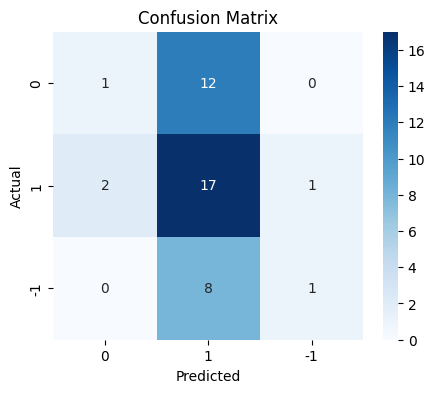

In [ ]:
plot_confusion_matrix(tuned_st, X_test_st, y_test)

In [ ]:
#Calculating different metrics on training data
final_model_test = model_performance_classification_sklearn(tuned_st,X_test_st,y_test)
print("Test performance for the final model:\n",final_model_test)

Test performance for the final model:
    Accuracy    Recall  Precision        F1
0  0.452381  0.452381   0.429108  0.361695


* Selected model didn't perform well on validation and test data
* I ran this with parameter tuning and with other models as GradientBoostingClassifier, DecisionTreeClassifier but performance still low.
* May be we don't enough data to improve the performance on Validation or Test
* I am stopping sentiment analysis here where I have selected Tuned Sentiment Transfer as best model

## **Weekly News Summarization**

**Important Note**: It is recommended to run this section of the project independently from the previous sections in order to avoid runtime crashes due to RAM overload.

#### Installing and Importing the necessary libraries

In [ ]:
# Installation for GPU llama-cpp-python
# uncomment and run the following code in case GPU is being used
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1

In [ ]:
!pip install llama-cpp-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 MB 32.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.2 MB/s eta 0:00:00
  Created wheel for llama-cpp-python: filename=llama_cpp_python-0.3.7-cp311-cp311-linux_x86_64.whl size=4599546 sha256=9646892aa6e8617d745daa1a8fcb452a9ba89e473e9dbf690c9172927601ea40
  Stored in directory: /root/.cache/pip/wheels/eb/82/79/ac77fcd49324b75ae6aa18e63a87cf9da4371a57e2cdc8dc03
Successfully built llama-cpp-python


In [ ]:
# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the library for data manipulation
import pandas as pd

from tqdm import tqdm # For progress bar related functionalities
tqdm.pandas()

#### Loading the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
stock_news = pd.read_csv("/content/drive/MyDrive/AIMLColab/Natural Language Processing/Project-Stock Market Sentiment Analysis/stock_news.csv")

In [ ]:
data_lama = stock_news.copy()

#### Loading the model

We are using Mistal-7B full information about this can be get from here https://huggingface.co/TheBloke/Mistral-7B-Instruct-v0.2-GGUF

In [ ]:
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"


model_path = hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


mistral-7b-instruct-v0.2.Q6_K.gguf:   0%|          | 0.00/5.94G [00:00<?, ?B/s]

* Mistral-7B model can be invoked from Python via llama-cpp-python as shown below

In [ ]:
llm = Llama(
    model_path=model_path, # Path to the model
    n_threads = 4,
    n_batch = 1024,
    n_gpu_layers=100, #Number of layers transferred to GPU
    n_ctx=4500, #Context window
)

llama_model_loader: loaded meta data with 24 key-value pairs and 291 tensors from /root/.cache/huggingface/hub/models--TheBloke--Mistral-7B-Instruct-v0.2-GGUF/snapshots/3a6fbf4a41a1d52e415a4958cde6856d34b2db93/mistral-7b-instruct-v0.2.Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = mistralai_mistral-7b-instruct-v0.2
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loade

#### Aggregating the data weekly

In [ ]:
data_lama["Date"] = pd.to_datetime(data_lama['Date'])  # Convert the 'Date' column to datetime format.

In [ ]:
# Group the data by week using the 'Date' column.
weekly_grouped = data_lama.groupby(pd.Grouper(key='Date', freq='W'))

In [ ]:
weekly_grouped = weekly_grouped.agg(
    {
        'News': lambda x: ' || '.join(x)  # Join the news values with ' || ' separator.
    }
).reset_index()

print(weekly_grouped.shape)

(18, 2)


In [ ]:
weekly_grouped

,Date,News
0,2019-01-06,The tech sector experienced a significant dec...
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...
2,2019-01-20,The U.S. stock market declined on Monday as c...
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre..."
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...
5,2019-02-10,"The Dow Jones Industrial Average, S&P 500, an..."
6,2019-02-17,"This week, the European Union's second highes..."
7,2019-02-24,This news article discusses progress towards ...
8,2019-03-03,The Dow Jones Industrial Average and other ma...
9,2019-03-10,"Spotify, the world's largest paid music strea..."


In [ ]:
# creating a copy of the data
data_lama_1 = weekly_grouped.copy()

#### Summarization

**Note**:

- The model is expected to summarize the news from the week by identifying the top three positive and negative events that are most likely to impact the price of the stock.

- As an output, the model is expected to return a JSON containing two keys, one for Positive Events and one for Negative Events.

For the project, we need to define the prompt to be fed to the LLM to help it understand the task to perform. The following should be the components of the prompt:

1. **Role**: Specifies the role the LLM will be taking up to perform the specified task, along with any specific details regarding the role

  - **Example**: `You are an expert data analyst specializing in news content analysis.`

2. **Task**: Specifies the task to be performed and outlines what needs to be accomplished, clearly defining the objective

  - **Example**: `Analyze the provided news headline and return the main topics contained within it.`

3. **Instructions**: Provides detailed guidelines on how to perform the task, which includes steps, rules, and criteria to ensure the task is executed correctly

  - **Example**:

```
Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.
```

4. **Output Format**: Specifies the format in which the final response should be structured, ensuring consistency and clarity in the generated output

  - **Example**: `Return the output in JSON format with keys as the topic number and values as the actual topic.`

**Full Prompt Example**:

```
You are an expert data analyst specializing in news content analysis.

Task: Analyze the provided news headline and return the main topics contained within it.

Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.

Return the output in JSON format with keys as the topic number and values as the actual topic.
```

**Sample Output**:

`{"1": "Politics", "2": "Economy", "3": "Health" }`

##### Utility Functions

In [ ]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    import json
    import re
    import warnings
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')
        print("start and end")

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            print(data_dict)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

##### Defining the response function

In [ ]:
#Defining the response function
def response_mistral_1(prompt, news):
    model_output = llm(
      f"""
      [INST]
      News Articles: {news}
      {prompt}
      [/INST]
      """,
      max_tokens=1024,
      temperature=0.01,
      top_p=0.95,
      top_k=50,
      echo=False,
    )

    final_output = model_output["choices"][0]["text"]

    return final_output

##### Checking the model output on a sample

In [ ]:
news = data_lama_1.loc[0, 'News']

In [ ]:
print(len(news.split(' ')))
news

2611


' The tech sector experienced a significant decline in the aftermarket following Apple\'s Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple\'s downward revision of its revenue expectations for the quarter, previously announced in January. ||  Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple\'s stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10 ||  Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple\'s shares fell 8.5% in post market trading, while Asian suppliers like Hon ||  This news article reports that yields o

In [ ]:
#Complete the code to define the prompt for this task
prompt = "Summarize each news with 20 words and identify it by positive or negative events seperated by : "

In [ ]:
%%time
summary = response_mistral_1(prompt, news)
print(summary)

llama_perf_context_print:        load time =  307533.05 ms
llama_perf_context_print: prompt eval time =  307531.85 ms /  3785 tokens (   81.25 ms per token,    12.31 tokens per second)
llama_perf_context_print:        eval time =  210000.98 ms /   726 runs   (  289.26 ms per token,     3.46 tokens per second)
llama_perf_context_print:       total time =  518339.98 ms /  4511 tokens


1. Apple's Q1 revenue warning causes significant stock declines for Apple and related suppliers, leading to broader market declines for tech indices. : Negative
      2. Yields on long-term U.S. Treasury securities hit lowest levels in nearly a year due to concerns about global economic health. : Negative
      3. Japanese yen surges as investors seek safety amid Apple's underperformance and global economic concerns. : Positive for yen
      4. Roku to offer premium channels on The Roku Channel, following Amazon's successful Channels business model. : Positive
      5. Apple's revenue warning triggers fears of a global economic slowdown, leading to losses for suppliers and the S&P 500. : Negative
      6. Apple cuts Q1 revenue forecast, citing lower iPhone revenue and upgrades, as well as weakness in emerging markets. : Negative
      7. Australian dollar experiences significant volatility and plunges to multi-year lows against major currencies. : Negative
      8. Japanese yen surges 

* Mistral-7B model provided the answer exactly as prompt has been asked, summary of 20 words seperated : and sentiment associated it.

##### Checking the model output on the weekly data

In [ ]:
prompt = """You are an expert data analyst specializing in news content analysis.

Task: Analyze the provided news and return news_summary, positive_week or negative_week as true or false.

Instructions:
1. Read the news carefully.
2. Summarize the news with 60 words
3. Analyze the sentiment of the news as positive_Week or negative_Week.
4. Make sure to provide only one json output
Return the output in JSON format with News_Summary, positive_Week or negative_Week as true or false.
"""

In [ ]:
%%time
data_lama_1['Key_Events'] = data_lama_1['News'].progress_apply(lambda x: response_mistral_1(prompt,x))

  0%|          | 0/18 [00:00<?, ?it/s]llama_perf_context_print:        load time =  324401.76 ms
llama_perf_context_print: prompt eval time =  324400.57 ms /  3913 tokens (   82.90 ms per token,    12.06 tokens per second)
llama_perf_context_print:        eval time =   19994.72 ms /    72 runs   (  277.70 ms per token,     3.60 tokens per second)
llama_perf_context_print:       total time =  344432.98 ms /  3985 tokens
 11%|█         | 2/18 [05:44<45:55, 172.23s/it]Llama.generate: 14 prefix-match hit, remaining 2388 prompt tokens to eval
llama_perf_context_print:        load time =  324401.76 ms
llama_perf_context_print: prompt eval time =  185314.08 ms /  2388 tokens (   77.60 ms per token,    12.89 tokens per second)
llama_perf_context_print:        eval time =   29245.05 ms /   115 runs   (  254.30 ms per token,     3.93 tokens per second)
llama_perf_context_print:       total time =  214623.86 ms /  2503 tokens
 17%|█▋        | 3/18 [09:19<47:28, 189.90s/it]Llama.generate: 14 prefi

CPU times: user 7h 32min 43s, sys: 13.4 s, total: 7h 32min 57s
Wall time: 44min 34s


In [ ]:
data_lama_1.head()

,Date,News,Key_Events
0,2019-01-06,The tech sector experienced a significant dec...,"{\n ""news_summary"": ""Apple's Q1 reve..."
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...,"{\n ""news_summary"": ""Sprint and Samsun..."
2,2019-01-20,The U.S. stock market declined on Monday as c...,"{\n ""news_summary"": ""U.S. stocks decli..."
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre...","{\n ""news_summary"": ""Swiss National ..."
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...,"{\n ""news_summary"": ""Caterpillar rep..."


##### Formatting the model output

In [ ]:
data_lama_1['model_response_parsed'] = data_lama_1['Key_Events'].apply(extract_json_data)
data_lama_1.head()

start and end
{'news_summary': "Apple's Q1 revenue warning led to a significant decline in its stock price and negatively impacted related suppliers, causing broader market declines for tech indices. Apple attributed the shortfall to weaker demand in China and fewer iPhone upgrades.", 'positive_week': False}
start and end
{'news_summary': "Sprint and Samsung plan to release 5G smartphones in nine US cities this summer, while AMS develops a new 3D facial recognition feature for smartphones. Deutsche Bank upgraded Universal Music Group's valuation, and Amazon's stock is predicted to surge. Geely forecasts flat sales due to economic slowdown, and China is making efforts to address US trade concerns. Qualcomm expands car computing chips into three tiers.", 'positive_week': True}
start and end
{'news_summary': 'U.S. stocks declined due to concerns over a global economic slowdown, particularly in China, which led to losses in tech and luxury goods sectors. Apple reported lower revenue from i

,Date,News,Key_Events,model_response_parsed
0,2019-01-06,The tech sector experienced a significant dec...,"{\n ""news_summary"": ""Apple's Q1 reve...",{'news_summary': 'Apple's Q1 revenue warning l...
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...,"{\n ""news_summary"": ""Sprint and Samsun...",{'news_summary': 'Sprint and Samsung plan to r...
2,2019-01-20,The U.S. stock market declined on Monday as c...,"{\n ""news_summary"": ""U.S. stocks decli...",{'news_summary': 'U.S. stocks declined due to ...
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre...","{\n ""news_summary"": ""Swiss National ...",{'news_summary': 'Swiss National Bank governor...
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...,"{\n ""news_summary"": ""Caterpillar rep...",{'news_summary': 'Caterpillar reports lower ea...


* Model has produced output as prompt as requested

In [ ]:
model_response_parsed = pd.json_normalize(data_lama_1['model_response_parsed'])
model_response_parsed.head()

,news_summary,positive_week
0,Apple's Q1 revenue warning led to a significan...,False
1,Sprint and Samsung plan to release 5G smartpho...,True
2,U.S. stocks declined due to concerns over a gl...,False
3,Swiss National Bank governor Andrea Maechler d...,True
4,Caterpillar reports lower earnings due to weak...,True


In [ ]:
final_output = pd.concat([data_lama_1.reset_index(drop=True),model_response_parsed],axis=1)
final_output.drop(['Key_Events','model_response_parsed'], axis=1, inplace=True)
final_output.columns = ['Week End Date', 'News', 'Summary', 'Positive Week']

final_output.head()

,Week End Date,News,Summary,Positive Week
0,2019-01-06,The tech sector experienced a significant dec...,Apple's Q1 revenue warning led to a significan...,False
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...,Sprint and Samsung plan to release 5G smartpho...,True
2,2019-01-20,The U.S. stock market declined on Monday as c...,U.S. stocks declined due to concerns over a gl...,False
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre...",Swiss National Bank governor Andrea Maechler d...,True
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...,Caterpillar reports lower earnings due to weak...,True


## **Conclusions and Recommendations**

**Sentiment Analysis**
* Base model for word2Vec, Glove and Sentence Transformer. All these model did perform very well on Trained data but not so well on Validation and Test data
* Tuned Sentence Transformer model with GridSearchCV did perform 10% better than base model
* Main reason may be not enough data to train

**LLM Prompt Engineering**
* Mistral-7B model used with llama-cpp for prompt engineering
* Tested the output of the model different prompts and output produced by model did vary according to the prompt
* A clear and uncluttered instruction as prompt to LLM model produces desired output




### Code **generate HTML** from ipynb

In [4]:
!pip install --upgrade nbconvert jinja2 ipython pandas google-colab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.7 MB/s eta 0:00:00


In [8]:
import nbformat
from nbconvert import HTMLExporter
from google.colab import files
import pandas as pd

# Load the notebook
notebook_filename = "/content/drive/MyDrive/AIMLColab/Natural Language Processing/Project-Stock Market Sentiment Analysis/NLP_Project_Full_Code.ipynb"  # Update this with your notebook's path
with open(notebook_filename, "r", encoding="utf-8") as f:
    notebook_content = nbformat.read(f, as_version=4)

# Check for and remove widgets metadata if it exists.
if 'widgets' in notebook_content.metadata:
    del notebook_content.metadata['widgets']
    print("Widgets metadata removed.")
else:
    print("No widgets metadata found.")

# Convert to HTML
html_exporter = HTMLExporter()
html_body, _ = html_exporter.from_notebook_node(notebook_content)

# Save to an HTML file
html_filename = "NLP_Project_Full_Code.html"
with open(html_filename, "w", encoding="utf-8") as f:
    f.write(html_body)

# Download the file
files.download(html_filename)

Widgets metadata removed.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>